**Primal hard SVM problem**
We first consider hard SVM, that is, we want to find a hyperlane that seperates all datas. Let me start with the conclusion, then derive the idea behind it. The goal is to solve the following optimizatoin problem

$$\min_{W,b} \frac{1}{2}W^T\cdot W $$
$$ \mbox{s.t.  } y_n (W^Tx+b) \ge 1 $$



Since the idea of support vector machine is to maximize the distance of points to the separating hyper plane, we fist consider how to compute distance between a point and a plane.
Let $<x, 1>$ be a fixed point in $\mathbb{R}^{n+1}$ and a hyperplane $H:wx' + b = 0$in $\mathbb{R}^{n+1}$. To compute thedistance between $x$ and $H$, note that the normal vector is $<w, 0>$. So the distance is 

$$d(x,b,W) = \mid\frac{W^T}{|W|}\cdot (x-x')\mid = \frac{1}{|W|} \mid W^Tx +b \mid$$

for any point $x'$ on $H$.

Then the optimization problem becomes 

$$ \max \mbox{ margin}(b,W)$$
$$  \mbox{s.t. }  y_n(W^Tx_n+b) >0 , \forall n $$

where margin$(b,W)$ is $\min_n \frac{1}{|W|}y_n(W^Tx_n+b)$

We can rescale $(W,b)$ without changing hyperplane, so we can consider the $(W,b)$
such that $\min_n y_n(W^Tx_n +b)= 1$.
It is easy to see the margin happens at the data points where 
$y_n(W^Tx_n +b)= 1.$

Then the optimization problem becomes

$$ \max \frac{1}{|W|} $$
$$  \mbox{s.t. }  y_n(W^Tx_n+b) \ge 1 , \forall n $$

which is equivalent to 

$$ \min \frac{1}{2}W^TW $$
$$ \mbox{s.t. }  y_n(W^Tx_n+b) \ge 1 , \forall 1\le n \le N $$



**Dual SVM problem**
For the primal SVM problem, we are solving $d+1$ variables $(W, b)$ with $N$ constrants. If $d$ is large, then hard to compute even using quadratic programming software. So we take the dual problem, the problem will be a quadratic optimizatoin probelm with $N$ varaibles and
$N+1$ constraints. The good thing is the $N\times N$ matrix will be sparse.

Now we derive the dual problem. Consider the Lagrange problem
$$\mathcal{L}(W,b,\alpha_n)= \frac{1}{2}W^TW + \sum_{n=1}^N \alpha _n(1-y_n(W^Tx_n+b))$$
We claim that the primal SVM problem is equivalent to 
$$\min _{W,b} \max_{\alpha _n \ge 0} \mathcal{L}(W,b,\alpha _n) $$

First of all note that 
$$ \max_{\alpha _n} \mathcal{L}(W,b,\alpha _n) $$
implies that the solution must be able to classiy all the datas.
If not, there is some $i$ such that 
$$ y_n(W^Tx_n+b)< 1.$$
The above equation will be $\infty$, which is not possible to be $min$.

Moreover, to get $max$, the $\alpha _n $ must be $0$ if $ y_n(W^Tx_n+b)> 1.$

W then have the following weak duality, where the left is
equivalent to the primal problem and the right is the $dual$  $problem$,
$$\min _{W,b} \max_{\alpha _n \ge 0} \mathcal{L}(W,b,\alpha _n) 
\ge  \max_{\alpha _n \ge 0} \min _{W,b}\mathcal{L}(W,b,\alpha _n) $$

**When does the weak duality become strong dualtiy?** i.e., the above inequality becomes equality.
**Answer:** Whenever the target function is quadratic, and all the constraints are affine.

Now consider 
$$ \min _{W,b}\mathcal{L}(W,b,\alpha _n)$$
Take partial of $\mathcal{L}$ with $b$ we get
$$\sum _{n= 1}^{N}\alpha _n\cdot y_n= 0 .$$
Take partial of $\mathcal{L}$ with respect to $W$ we get
$$W_i = \sum _{n= 1}^{N} \alpha _n y_n x_{n, i}$$, or in vector form
$$W = \sum _{n= 1}^{N}\alpha _n y_n X_n $$

The dual problem becomes
$$\max _{\alpha _n\ge 0,\sum \alpha _n y_n= 0 , W = \sum \alpha _n y_n X_n }  \frac{1}{2}W^TW + \sum \alpha _n - W^TW$$
$$= \max _{\alpha _n\ge 0,\sum \alpha _n y_n= 0 , W = \sum \alpha _n y_n X_n } -\frac{1}{2} || \sum \alpha _n y_n X_n||^2 +\sum\alpha _n$$

Here is the final form of the dual hard SVM problem
$$ \min \frac{1}{2} \sum_n \sum_m \alpha_n\alpha_my_ny_mX^T_nX_m-\sum \alpha _n$$
$$\mbox{s.t. } \alpha_n \ge 0, \sum \alpha_n y_n = 0$$
Solving for $N$ varaiables ($\alpha_n$) with $N+1$ constraints.

We then compute $b$ by 
$$1- y_n(W^TX_n+b) = 0$$ for $n$
such that $\alpha _n > 0, $ i.e. the support vector.

**Pros of considering dual problem instead of primal problem** I guess it is important to note that the optimal choice of 
$W$ is represented by  data, and we only consider the data point on the boundary. More precisely, 
$$ W_{SVM} = \sum \alpha_ny_nX_n .$$
We also note that most of the $\alpha_n$ are zero. This is one of the reasons that dual problem is better.

**Hard SVM with kernel trick**
Translate the hard SVM problem into the form that CVXOPT package required.
$$\min \frac{1}{2}\alpha ^T P\alpha -\textbf{1}^T\alpha$$
$$\mbox{s.t. } \alpha \ge 0, \alpha ^T Y = 0$$
were $P_{n,m} = y_ny_mX_n^TX_m $. More generally, we can make a transformation of $X$ first. That is 
$$P_{n,m} = y_ny_m \Phi(X_n)^T \Phi(X_m).$$
If we pick the transformation in a cleaver way, we can write
$$P_{n,m} = y_ny_m \Phi(X)^T \Phi(X)= y_ny_m K(X_n, X_m)$$

In [15]:
#we need to use the optimization package CVXOPT
#To install : in terminal run 'conda install cvxopt'
#sol = solvers.qp(P,q,G,h, A,b)
'''
P = P
q = 1^T
h = 0
G = -1 diagonal NxN matrix
h = dimension N 0 vector
A = Y.transpose()
b = 0
'''
import numpy as np
from cvxopt import matrix
from cvxopt import solvers
import matplotlib.pyplot as plt
%matplotlib inline 


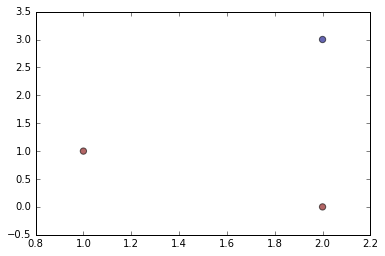

In [25]:
#we consider a toy example with three points
x = np.array([[1,1], [2,0], [2,3]])
y = np.array([[-1],[-1],[1]])
color = [y == -1]
x1, x2 = zip(*x)
fig, ax = plt.subplots()
ax.scatter(x1, x2, c = color, alpha = 0.6, s = 40)
t = np.linspace(0.8, 2.2, 0.001)
ax.plot(t, -0.5*t+2.75, 'r')



In [17]:
#translate the optimizarion problem innto the form required by CVXOPT
P = matrix(np.dot(x, np.transpose(x))*(y*np.transpose(y)), tc='d')
q = matrix(-1*np.ones((3,1)),tc='d')
G = matrix(np.diag([-1,-1,-1]), tc='d')
h = matrix(np.zeros((3,1)), tc='d')
A = matrix(y.transpose(),tc='d')
b = matrix([0], tc = 'd')
sol = solvers.qp(P,q,G,h, A,b)
alpha = np.array(sol['x'])
alpha
#Note that the second alpha=0, which means it is NOT on the boundary

     pcost       dcost       gap    pres   dres
 0: -3.6735e-01 -9.3878e-01  4e+00  2e+00  1e+00
 1: -2.9890e-01 -7.6727e-01  5e-01  3e-16  5e-16
 2: -3.8676e-01 -4.1756e-01  3e-02  2e-16  4e-16
 3: -3.9941e-01 -4.0022e-01  8e-04  1e-16  1e-16
 4: -3.9999e-01 -4.0000e-01  8e-06  1e-16  2e-16
 5: -4.0000e-01 -4.0000e-01  8e-08  6e-17  1e-16
Optimal solution found.


array([[  3.99999832e-01],
       [  1.48907322e-07],
       [  3.99999981e-01]])

In [18]:
#compute the coefiiciens W and intercept b
w =  np.dot(x.transpose(), y*alpha)
b = y[0]*(1- y[0]*np.dot(w.transpose(), x[0]))
w, b

(array([[ 0.39999983],
        [ 0.80000011]]), array([-2.19999994]))

So the hyperplane if 
$$ 0.4x_1+ 0.8x_2-2.2 $$
We note that if we plug in support vector, say point one or point three, we get 
$$y_n(W^Tx_n+b) = 1$$

AttributeError: 'AxesSubplot' object has no attribute 'show'